In this notebook, we cover:

* [Typical and Unusual Values](#Typical-and-Unusual-Values)
* [Missing Values](#Missing-Values)

# Typical and Unusual Values

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
print(diamonds)

# A tibble: 53,940 x 10
   carat cut       color clarity depth table price     x     y     z
   <dbl> <ord>     <ord> <ord>   <dbl> <dbl> <int> <dbl> <dbl> <dbl>
 1 0.23  Ideal     E     SI2      61.5    55   326  3.95  3.98  2.43
 2 0.21  Premium   E     SI1      59.8    61   326  3.89  3.84  2.31
 3 0.23  Good      E     VS1      56.9    65   327  4.05  4.07  2.31
 4 0.290 Premium   I     VS2      62.4    58   334  4.2   4.23  2.63
 5 0.31  Good      J     SI2      63.3    58   335  4.34  4.35  2.75
 6 0.24  Very Good J     VVS2     62.8    57   336  3.94  3.96  2.48
 7 0.24  Very Good I     VVS1     62.3    57   336  3.95  3.98  2.47
 8 0.26  Very Good H     SI1      61.9    55   337  4.07  4.11  2.53
 9 0.22  Fair      E     VS2      65.1    61   337  3.87  3.78  2.49
10 0.23  Very Good H     VS1      59.4    61   338  4     4.05  2.39
# … with 53,930 more rows


Let us look at the distribution of the **x** variable.

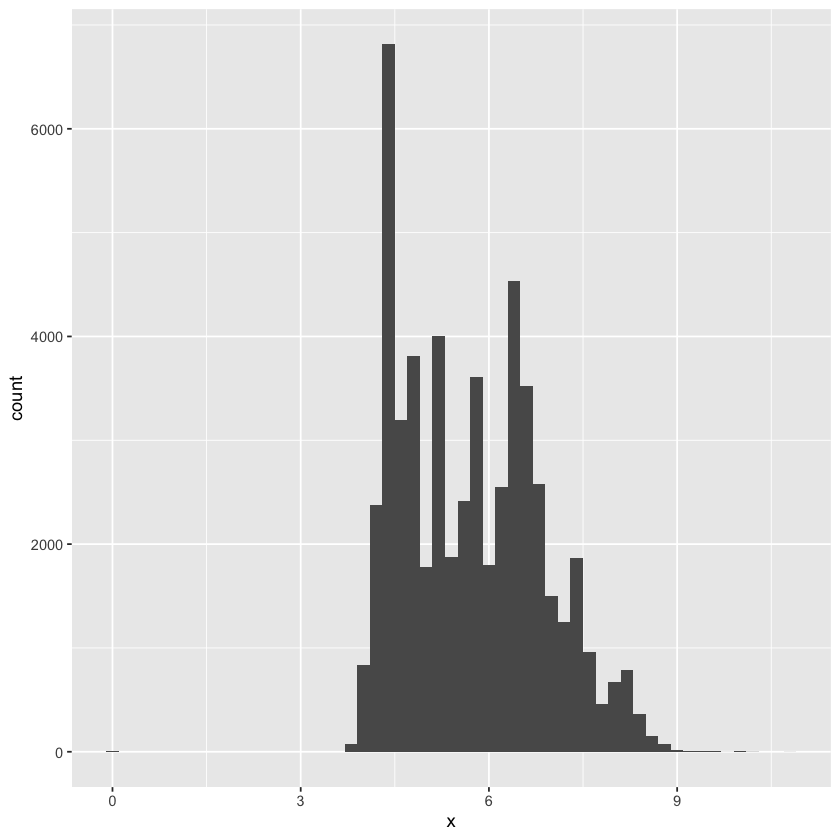

In [3]:
ggplot(data = diamonds) +
    geom_histogram(mapping = aes(x = x), binwidth = 0.2)

There appear to be some unusual values close to 0 and, on the other extreme, larger than 10.

In [4]:
filter(diamonds, x < 1 | x > 10) %>%
    arrange(x)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1.07,Ideal,F,SI2,61.6,56,4954,0.00,6.62,0.00
1.00,Very Good,H,VS2,63.3,53,5139,0.00,0.00,0.00
1.14,Fair,G,VS1,57.5,67,6381,0.00,0.00,0.00
1.56,Ideal,G,VS2,62.2,54,12800,0.00,0.00,0.00
1.20,Premium,D,VVS1,62.1,59,15686,0.00,0.00,0.00
2.25,Premium,H,SI2,62.8,59,18034,0.00,0.00,0.00
0.71,Good,F,SI2,64.1,60,2130,0.00,0.00,0.00
0.71,Good,F,SI2,64.1,60,2130,0.00,0.00,0.00
4.00,Very Good,I,I1,63.3,58,15984,10.01,9.94,6.31


Let us redo the visualization with extreme values filtered out.

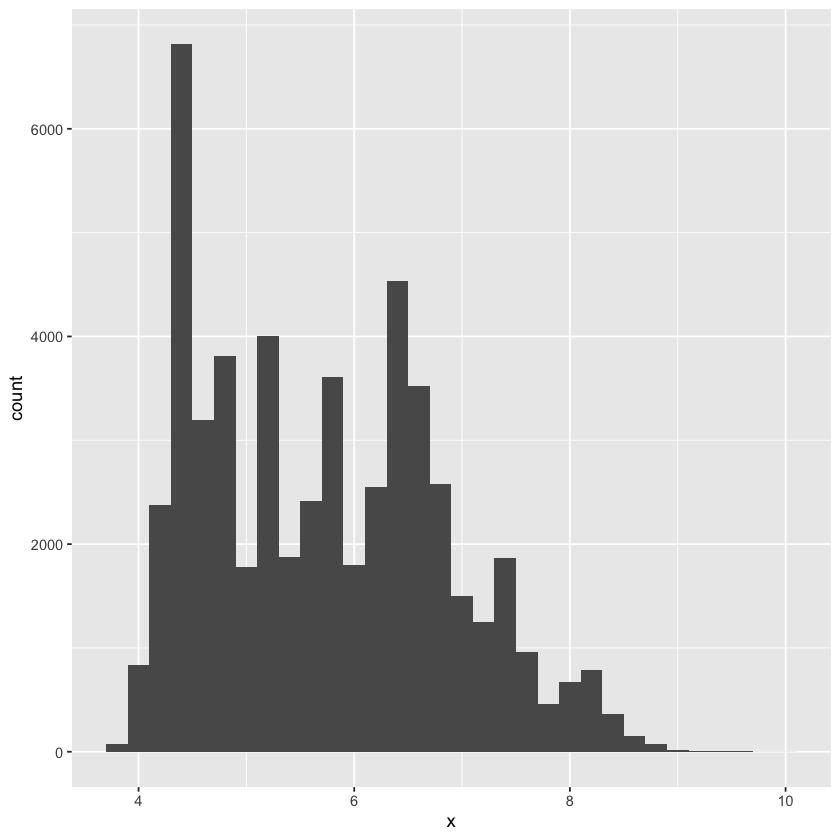

In [5]:
filter(diamonds, x >= 1, x <= 10) %>%
    ggplot() +
        geom_histogram(mapping = aes(x = x), binwidth = 0.2)

Let us now look at the distribution of the **y** variable.

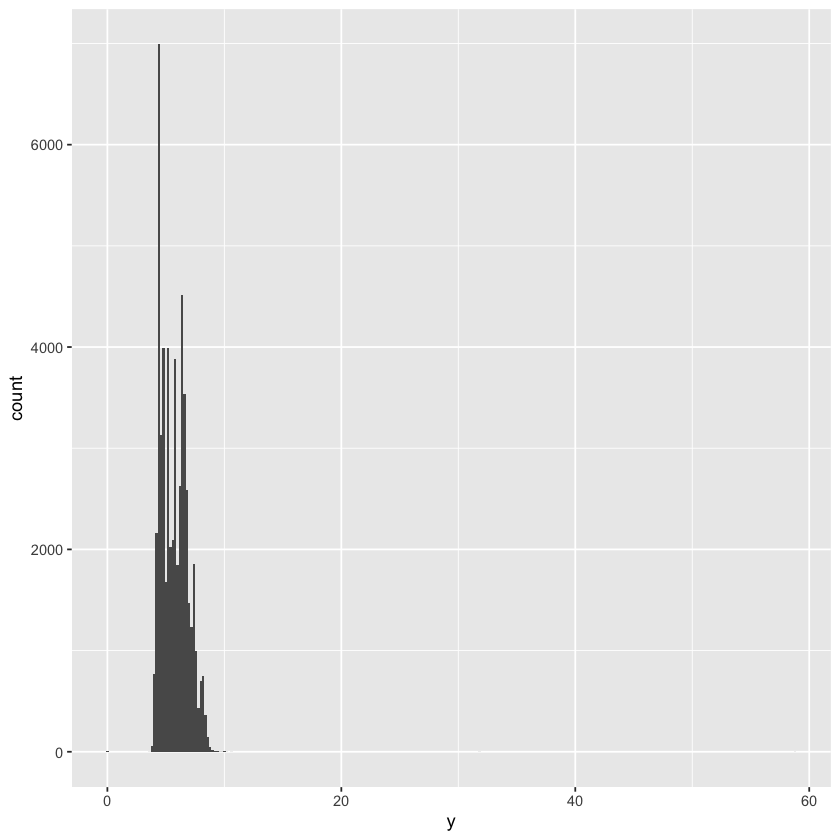

In [6]:
ggplot(data = diamonds) +
    geom_histogram(mapping = aes(x = y), binwidth = 0.2)

In this case, let us try to examine **y** values close to 0 and larger than 20.

In [7]:
filter(diamonds, y < 1 | y > 20) %>%
    arrange(y)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1.00,Very Good,H,VS2,63.3,53,5139,0.00,0.0,0.00
1.14,Fair,G,VS1,57.5,67,6381,0.00,0.0,0.00
1.56,Ideal,G,VS2,62.2,54,12800,0.00,0.0,0.00
1.20,Premium,D,VVS1,62.1,59,15686,0.00,0.0,0.00
2.25,Premium,H,SI2,62.8,59,18034,0.00,0.0,0.00
0.71,Good,F,SI2,64.1,60,2130,0.00,0.0,0.00
0.71,Good,F,SI2,64.1,60,2130,0.00,0.0,0.00
0.51,Ideal,E,VS1,61.8,55,2075,5.15,31.8,5.12
2.00,Premium,H,SI2,58.9,57,12210,8.09,58.9,8.06


Let us redo the distribution of **y** with unusual values filtered out.

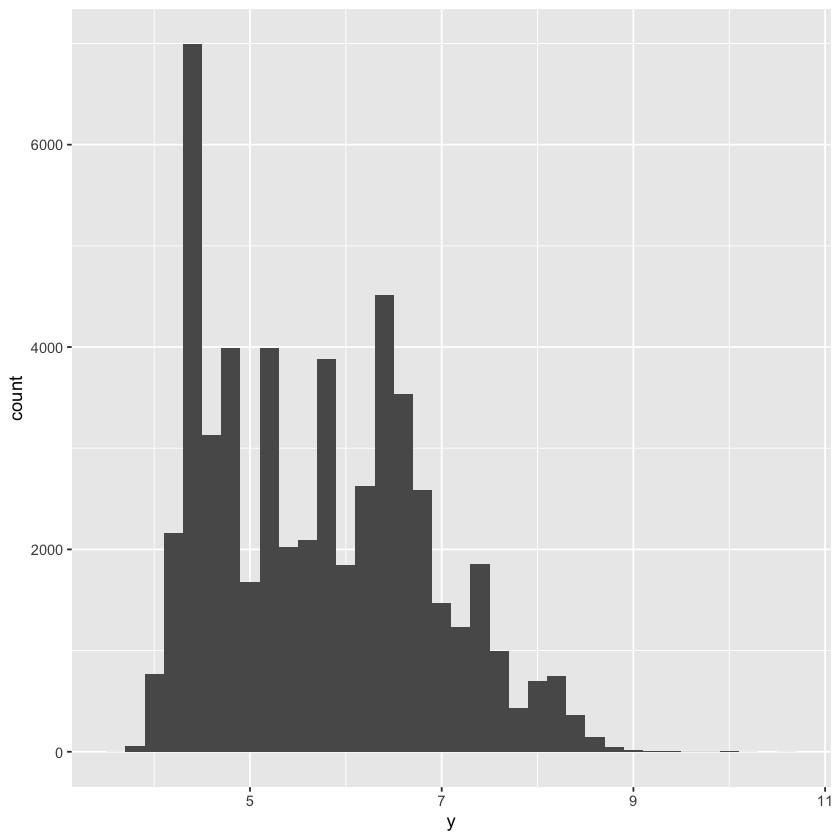

In [8]:
filter(diamonds, y >=1, y <= 20) %>%
    ggplot() +
        geom_histogram(mapping = aes(x = y), binwidth = 0.2)

Finally, let us examine the **z** variable.

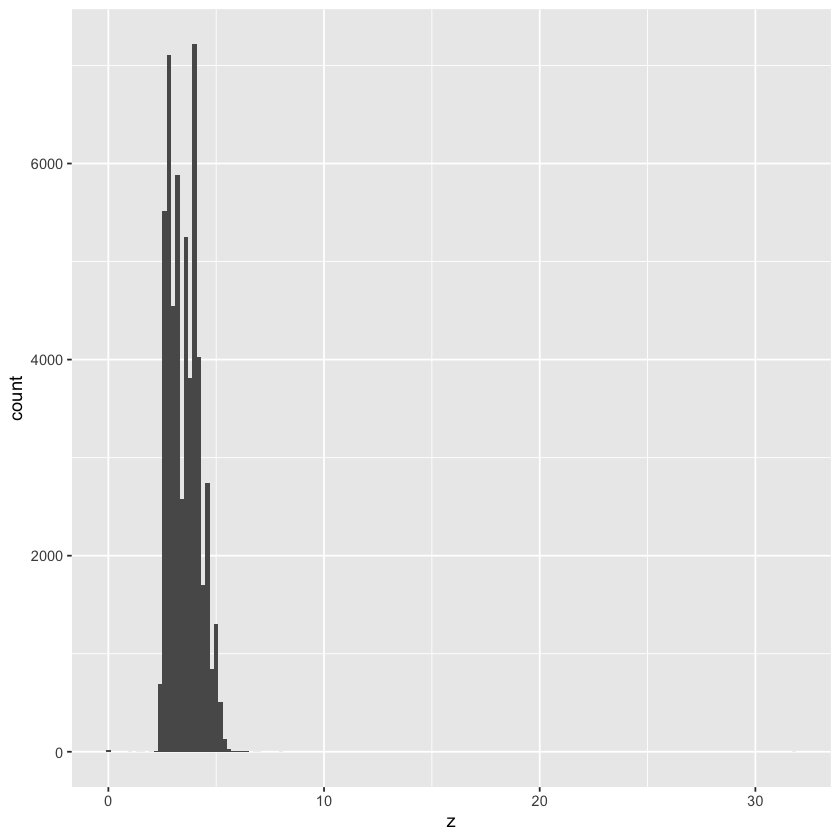

In [9]:
ggplot(data = diamonds) +
    geom_histogram(mapping = aes(x = z), binwidth = 0.2)

As before, we focus on the unusual values at the two extremes.

In [10]:
filter(diamonds, z < 1 | z > 10) %>%
    arrange(z)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0


Now we redo the **z** distribution with unusual values filtered out.

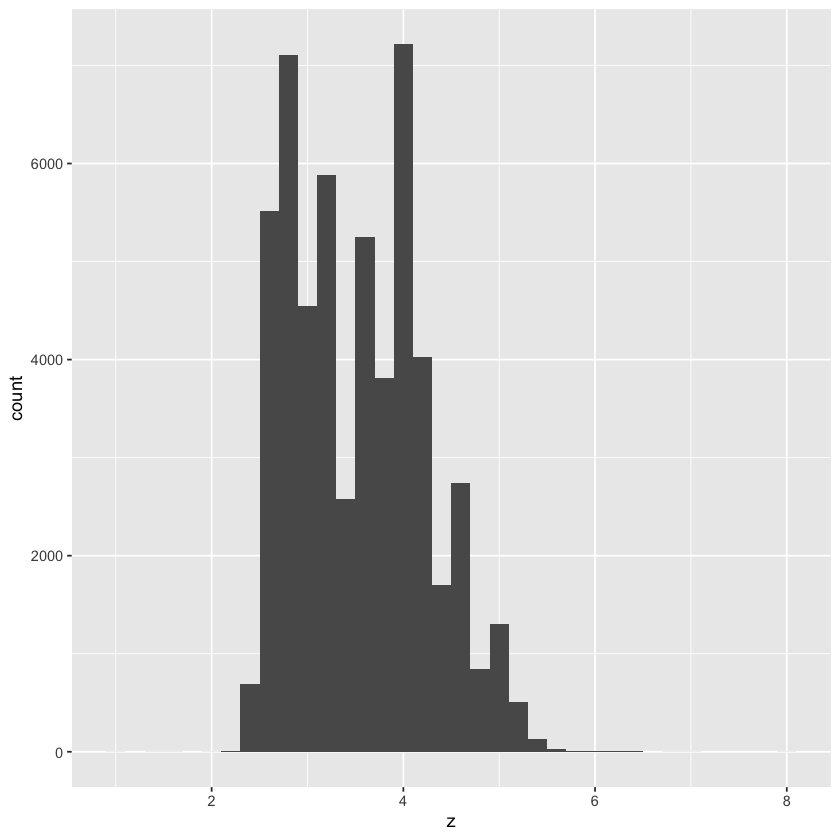

In [11]:
filter(diamonds, z >= 1, z <= 10) %>%
    ggplot() +
        geom_histogram(mapping = aes(x = z), binwidth = 0.2)

We now want to look at the **price** distribution.

In [12]:
summarize(diamonds, max = max(price), min = min(price))

max,min
<int>,<int>
18823,326


Ok, so the price ranges from 18,823 USD down to 326 USD. Let us initially choose a bin width of 1000 USD.

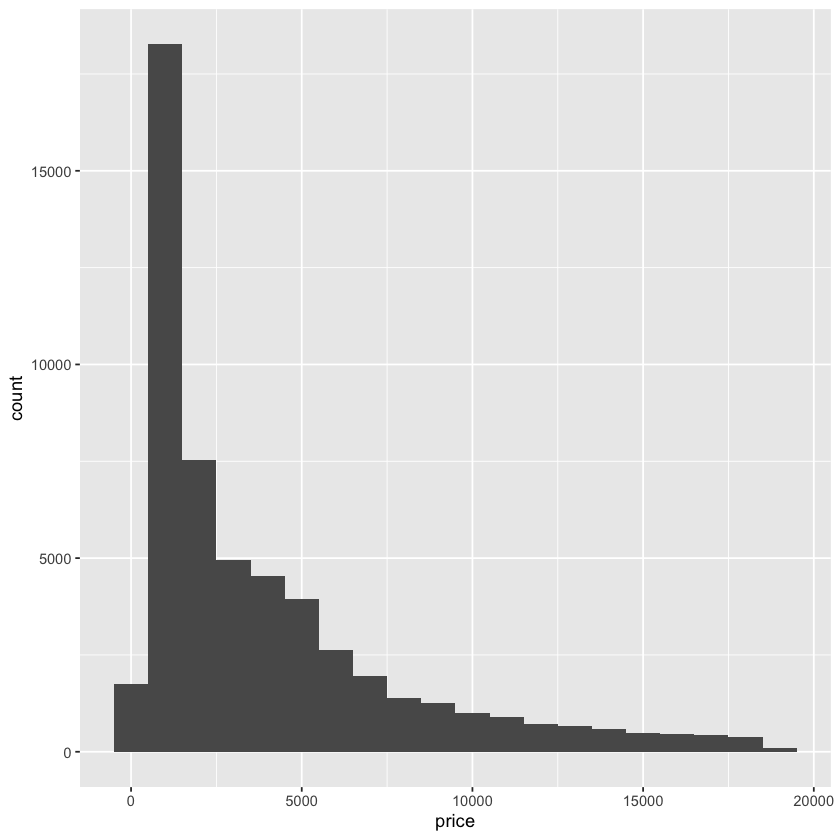

In [13]:
ggplot(data = diamonds) +
    geom_histogram(mapping = aes(x = price), binwidth = 1000)

This makes sense. The distribution peaks well below 2,500 USD and decays slowly towards very high prices.

Let us change to a bin width of 100 to see a surprise!

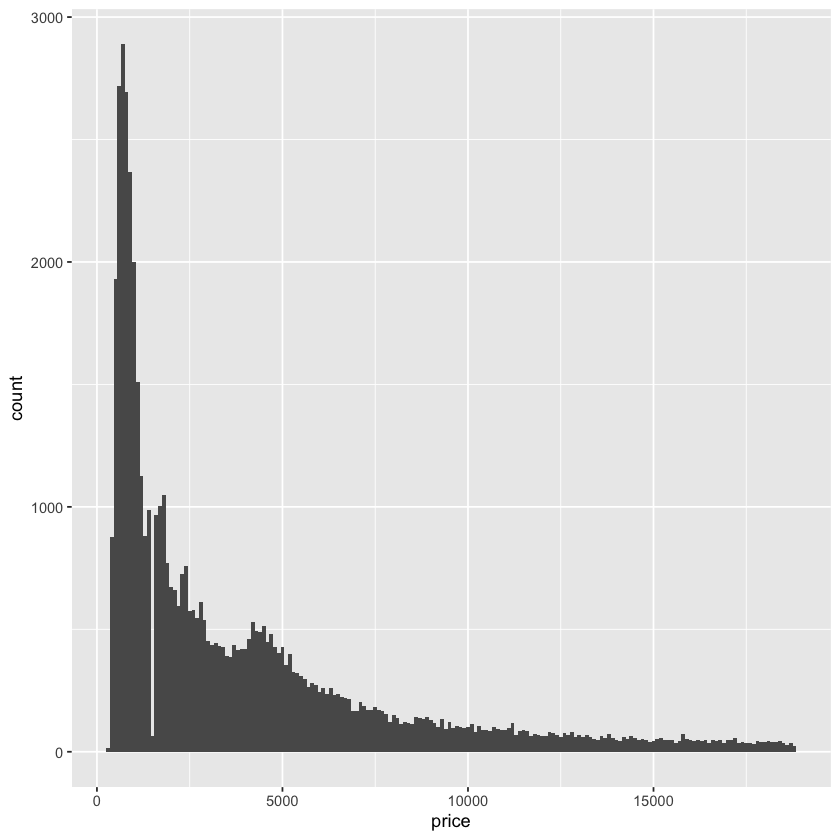

In [14]:
ggplot(data = diamonds) +
    geom_histogram(mapping = aes(x = price), binwidth = 100)

That dip is intriguing. Let us examine it more closely.

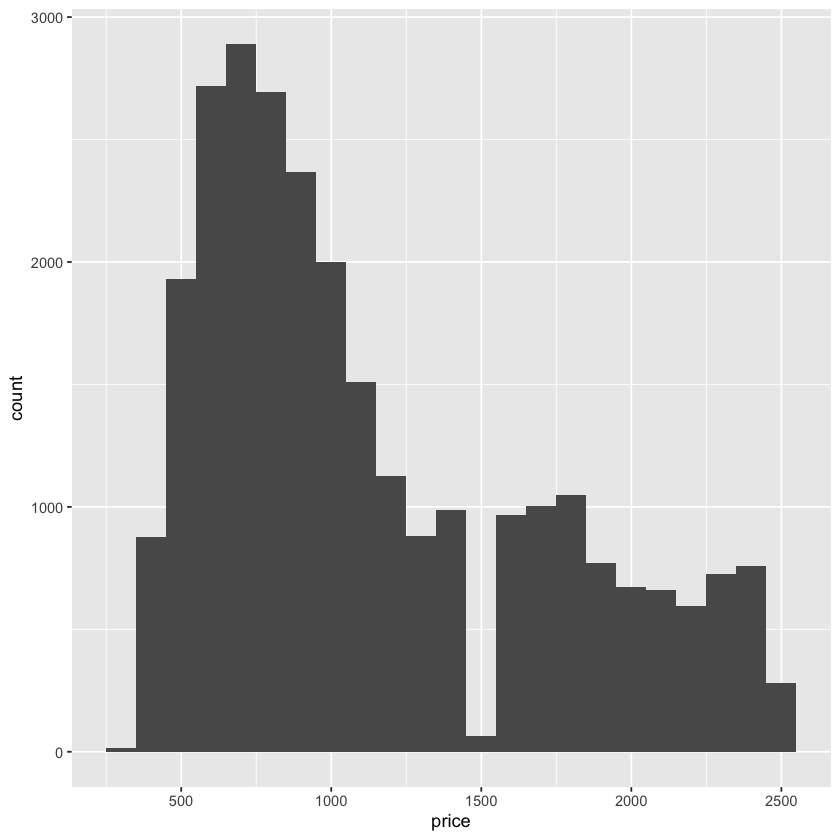

In [15]:
filter(diamonds, price <= 2500) %>%
    ggplot() +
    geom_histogram(mapping = aes(x = price), binwidth = 100)

Hmmm... So few diamonds near the price of 1500 USD. What's going on? Let us decrease the bin width to 50 USD. 

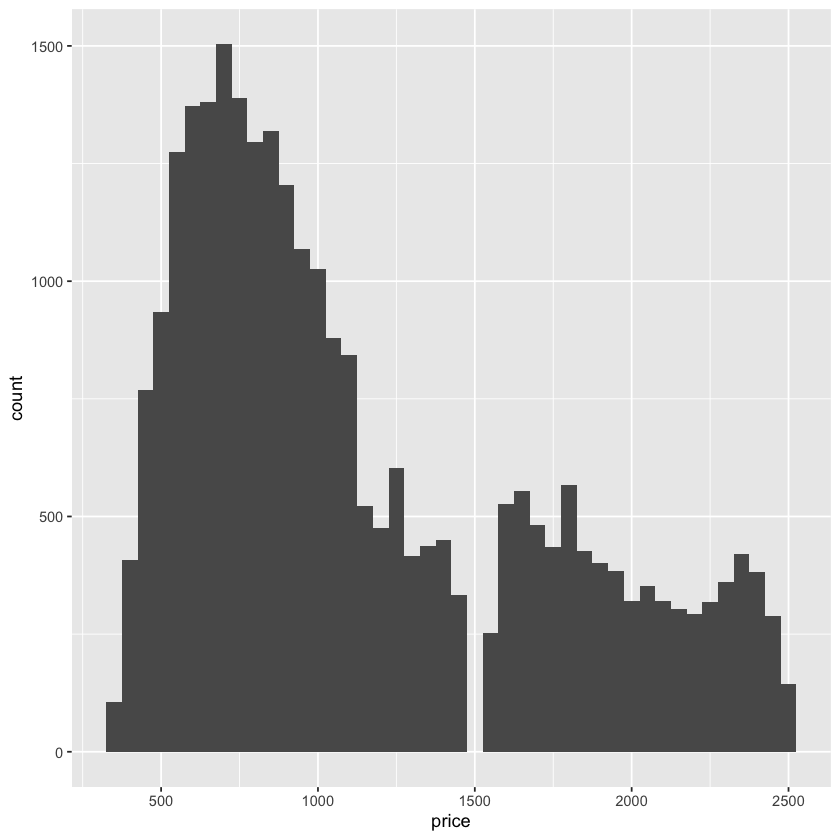

In [16]:
filter(diamonds, price <= 2500) %>%
    ggplot() +
        geom_histogram(mapping = aes(x = price), binwidth = 50)

It really appears that the 1,500 USD price tag is being avoided!!!

In [17]:
filter(diamonds, price > 1450, price < 1550)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.50,Ideal,E,VS2,62.7,55.0,1451,5.08,5.12,3.20
0.52,Ideal,F,VS2,61.3,56.0,1451,5.14,5.20,3.17
0.52,Premium,F,VS2,60.2,59.0,1451,5.19,5.21,3.13
0.50,Very Good,E,VS2,62.1,62.0,1451,5.08,5.10,3.16
0.46,Very Good,E,VS1,58.7,60.0,1452,5.08,5.15,3.00
0.52,Very Good,D,SI1,63.8,56.0,1452,5.06,5.10,3.24
0.59,Very Good,F,SI1,62.4,59.0,1452,5.33,5.37,3.34
0.54,Ideal,I,VS1,62.3,57.0,1452,5.20,5.24,3.25
0.58,Very Good,E,SI1,59.6,57.0,1453,5.41,5.42,3.23


We can **facet** on **cut**.

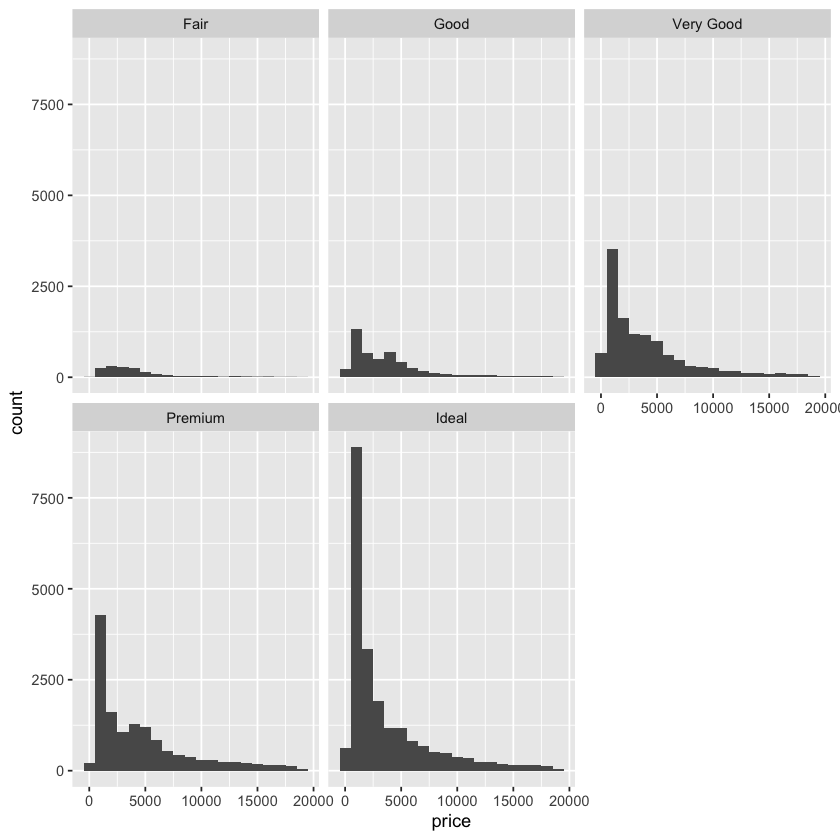

In [18]:
ggplot(data = diamonds) +
    geom_histogram(mapping = aes(x = price), binwidth = 1000) +
    facet_wrap(~ cut)

Now we examine the **carat** distribution.

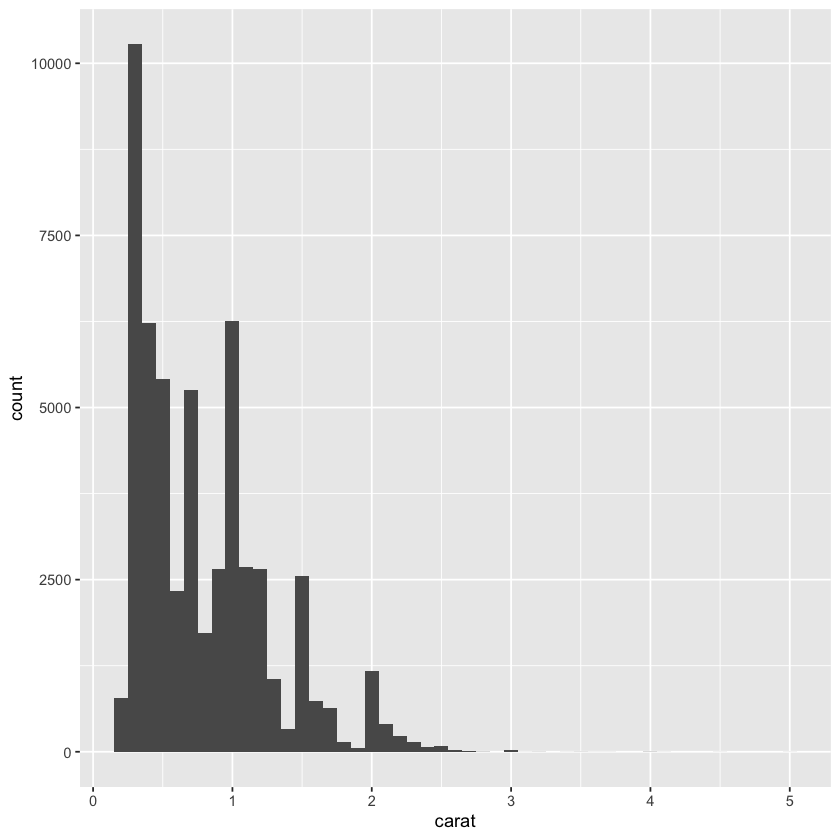

In [19]:
ggplot(data = diamonds) +
    geom_histogram(mapping = aes(x = carat), binwidth = 0.1)

What's going on near 3? Let us investigate...

In [20]:
filter(diamonds, carat > 3) %>%
    arrange(carat)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
3.01,Premium,I,I1,62.7,58,8040,9.10,8.97,5.67
3.01,Premium,F,I1,62.2,56,9925,9.24,9.13,5.73
3.01,Fair,H,I1,56.1,62,10761,9.54,9.38,5.31
3.01,Premium,G,SI2,59.8,58,14220,9.44,9.37,5.62
3.01,Ideal,J,SI2,61.7,58,16037,9.25,9.20,5.69
3.01,Ideal,J,I1,65.4,60,16538,8.99,8.93,5.86
3.01,Premium,I,SI2,60.2,59,18242,9.36,9.31,5.62
3.01,Fair,I,SI2,65.8,56,18242,8.99,8.94,5.90
3.01,Fair,I,SI2,65.8,56,18242,8.99,8.94,5.90


Okay, now let us zoom into the **carat** range around 1.

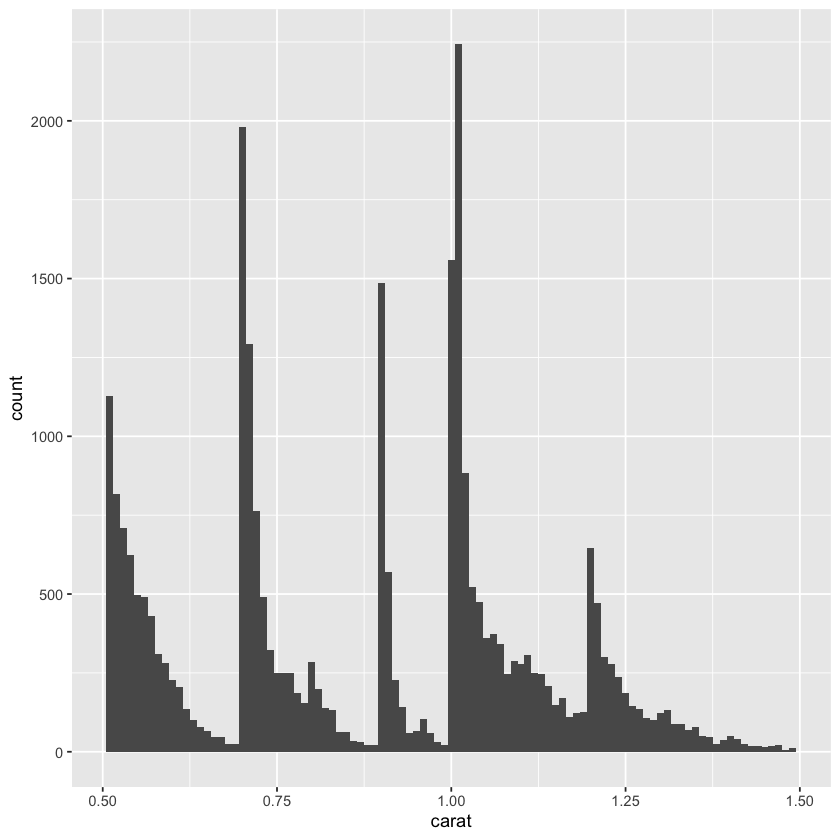

In [21]:
filter(diamonds, carat > 0.5, carat < 1.5) %>%
    ggplot() +
        geom_histogram(mapping = aes(x = carat), binwidth = 0.01)

What might explain the strange histogram above? Tendency to round the **carat** values?

# Missing Values

Remember those zero values for **x, y, z** variables? They are almost certainly the result of data entry errors.

In [22]:
filter(diamonds, near(x,0) | near(y,0) | near(z, 0))

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1.00,Premium,G,SI2,59.1,59,3142,6.55,6.48,0
1.01,Premium,H,I1,58.1,59,3167,6.66,6.60,0
1.10,Premium,G,SI2,63.0,59,3696,6.50,6.47,0
1.01,Premium,F,SI2,59.2,58,3837,6.50,6.47,0
1.50,Good,G,I1,64.0,61,4731,7.15,7.04,0
1.07,Ideal,F,SI2,61.6,56,4954,0.00,6.62,0
1.00,Very Good,H,VS2,63.3,53,5139,0.00,0.00,0
1.15,Ideal,G,VS2,59.2,56,5564,6.88,6.83,0
1.14,Fair,G,VS1,57.5,67,6381,0.00,0.00,0


Let us create a new data set with the unusual values replaces with NA. That is, we are explicitly marking them as **missing values**.

We will use a new function below: `ifelse()`.

In [23]:
diamonds_new <- diamonds %>%
                    mutate(x = ifelse(near(x, 0) | x > 10, NA, x)) %>%
                    mutate(y = ifelse(near(y, 0) | y > 20, NA, y)) %>%
                    mutate(z = ifelse(near(z, 0) | z > 10, NA, z))

`ggplot()` issues a warning if it encounters missing values.

Warning message:
“Removed 15 rows containing missing values (geom_point).”


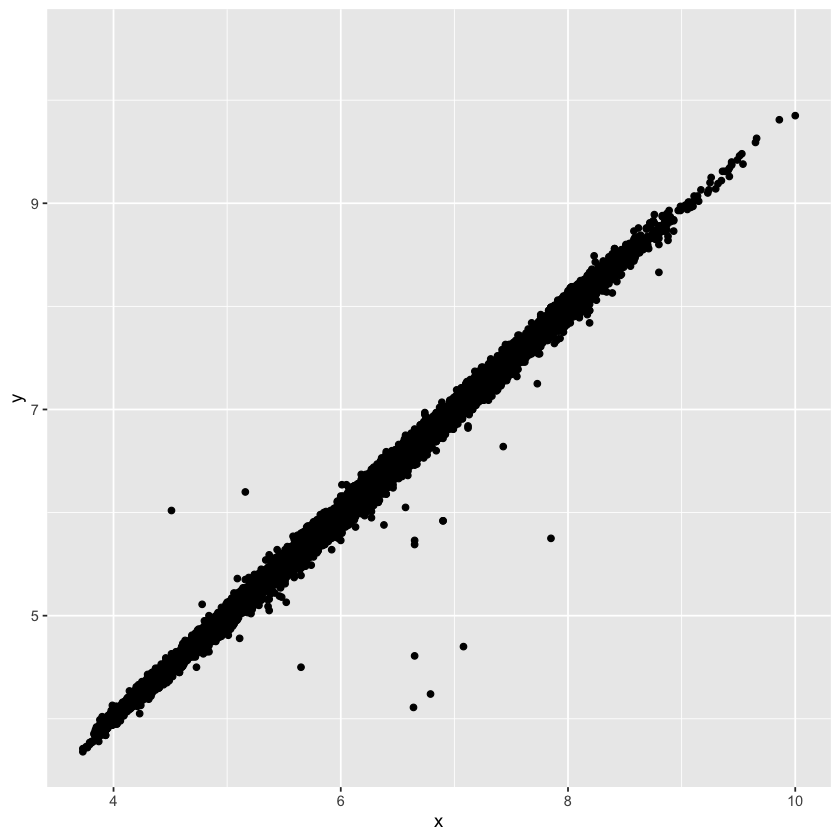

In [24]:
ggplot(data = diamonds_new) +
    geom_point(mapping = aes(x = x, y = y))

You can suppress the warning by supplying the value `TRUE` for the argument `na.rm`.

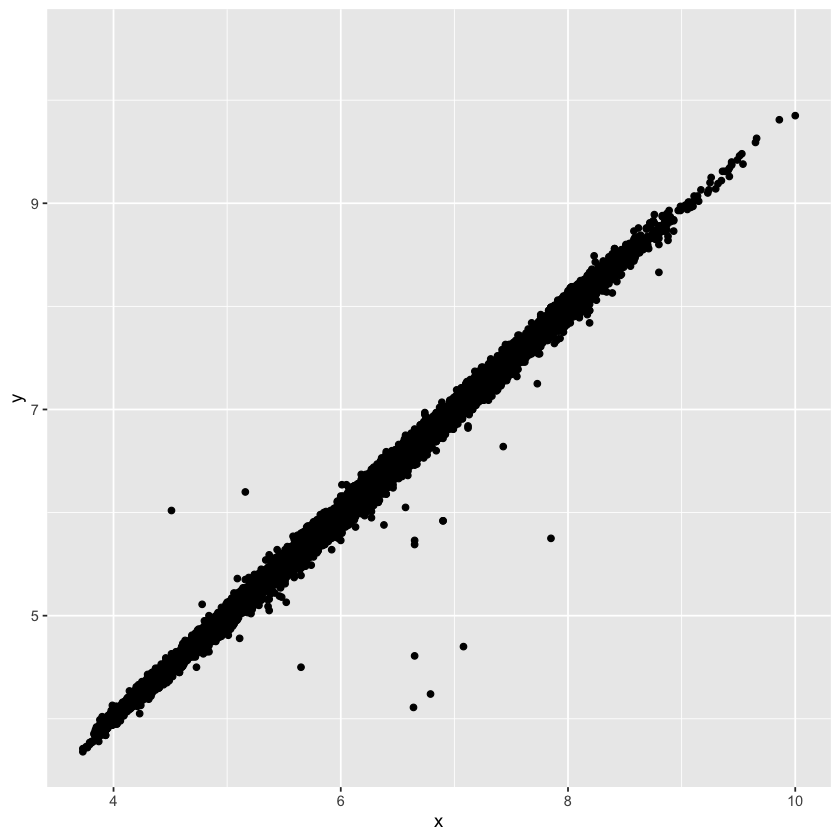

In [25]:
ggplot(data = diamonds_new) +
    geom_point(mapping = aes(x = x, y = y), na.rm = TRUE)

Let us load the `nycflights13` package.

In [26]:
library(nycflights13)
print(flights)

# A tibble: 336,776 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      542            540         2      923            850
 4  2013     1     1      544            545        -1     1004           1022
 5  2013     1     1      554            600        -6      812            837
 6  2013     1     1      554            558        -4      740            728
 7  2013     1     1      555            600        -5      913            854
 8  2013     1     1      557            600        -3      709            723
 9  2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753            745
# … with 336,766 more rows,

The columns `hour` and `minute` are supposed to be the scheduled departure time separated into hour and minute. Can you verify that that is indeed the case?

In [27]:
# filter(flights, ???)

Let us try to visualize `sched_dep_time`.

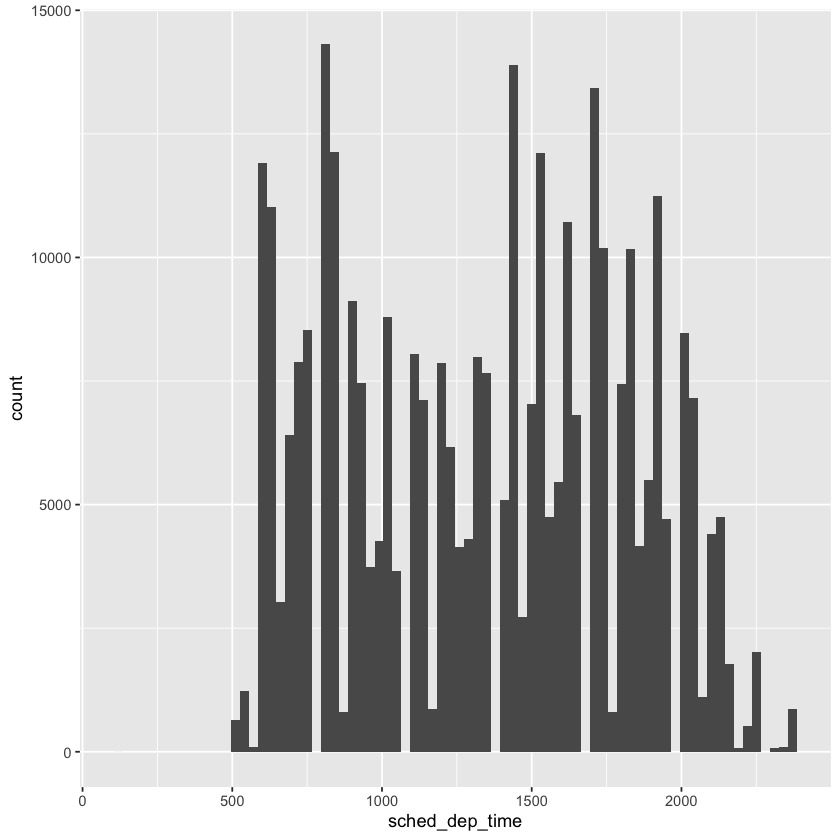

In [28]:
ggplot(data = flights) +
    geom_histogram(mapping = aes(x = sched_dep_time), binwidth=30)

Let us now try `dep_time`.

Warning message:
“Removed 8255 rows containing non-finite values (stat_bin).”


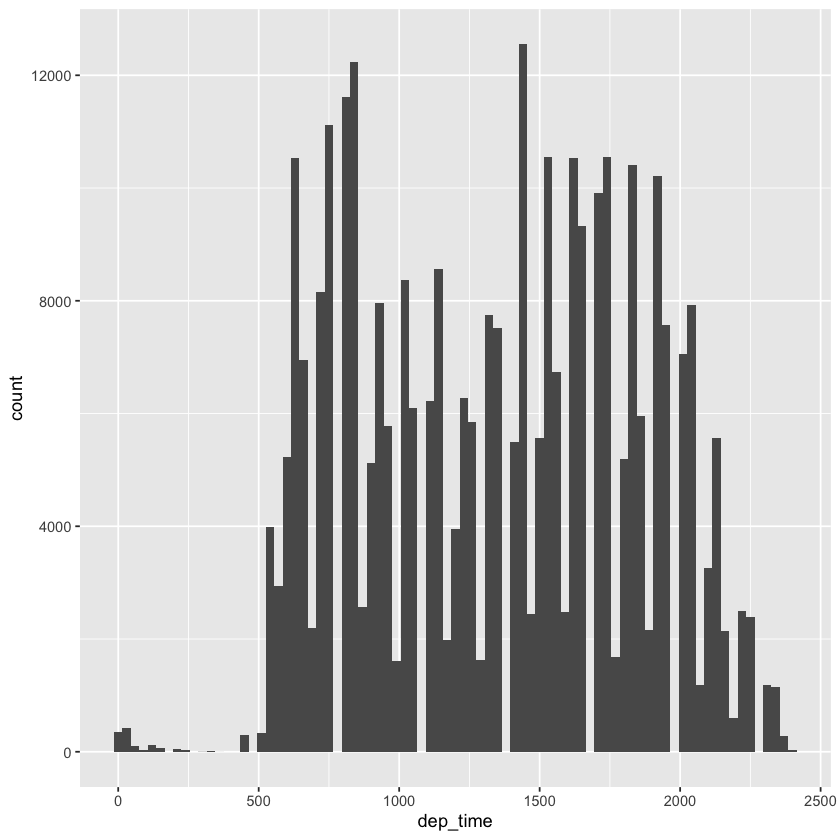

In [29]:
ggplot(data = flights) +
    geom_histogram(mapping = aes(x = dep_time), binwidth=30)

Why are there gaps in the previous two histograms?

Let us now try to convert both `sched_dep_time` and `dep_time` into fractional hours. E.g., `530` should become `5.5`.

In [30]:
#new_flights <-  select(flights, year:sched_dep_time) %>%
#                mutate(
#                        sched_dep_time = ???,
#                        dep_time = ???
#                      ) %>%
#                print()

In [31]:
#ggplot(data = new_flights) +
#    geom_histogram(mapping = aes(x = sched_dep_time), binwidth=???)

In [32]:
#ggplot(data = new_flights) +
#    geom_histogram(mapping = aes(x = dep_time), binwidth=?)

Fill in this code to to first create a column `cancelled` that denotes whether or not the flight was cancelled (i.e., `dep_time` is missing)
Then for each airline (`carrier`), find out number of cancelled flights `cancel_count`, number of flights `count`, and the percentage of cancelled flights `cancel_percent`.
Finally arrange in descending order of `cancel_percent`.

In [33]:
#mutate(flights, ???) %>%
#    group_by(???) %>%
#    summarize(cancel_count = ???, count = ???, cancel_percent = ???) %>%
#    arrange(???)